In [1]:
import itertools
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import contextily as ctx
import pointpats

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# load the dataset
df_crime =pd.read_csv(join('Crime_Data_from_2020_to_Present.csv'))
df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [29]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892934 entries, 0 to 892933
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           892934 non-null  int64  
 1   Date Rptd       892934 non-null  object 
 2   DATE OCC        892934 non-null  object 
 3   TIME OCC        892934 non-null  int64  
 4   AREA            892934 non-null  int64  
 5   AREA NAME       892934 non-null  object 
 6   Rpt Dist No     892934 non-null  int64  
 7   Part 1-2        892934 non-null  int64  
 8   Crm Cd          892934 non-null  int64  
 9   Crm Cd Desc     892934 non-null  object 
 10  Mocodes         768605 non-null  object 
 11  Vict Age        892934 non-null  int64  
 12  Vict Sex        774633 non-null  object 
 13  Vict Descent    774625 non-null  object 
 14  Premis Cd       892924 non-null  float64
 15  Premis Desc     892386 non-null  object 
 16  Weapon Used Cd  309539 non-null  float64
 17  Weapon Des

In [3]:
#temperatures.info()
df_crime['LON'] = df_crime['LON'].abs()
df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,118.3277


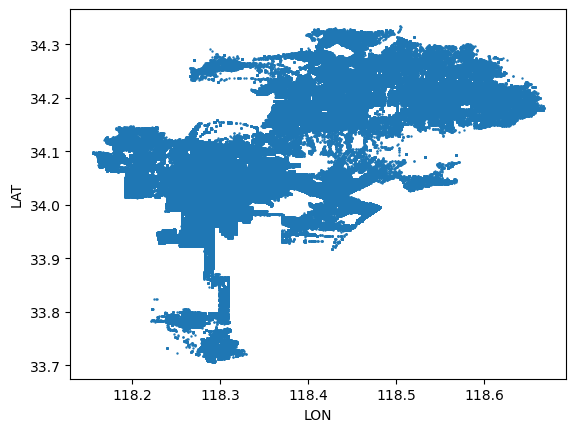

In [4]:
df_crime = df_crime[(df_crime['LON'] != 0) & (df_crime['LAT'] != 0)]

# Plotting the scatter plot after dropping rows
df_crime.plot.scatter(x='LON', y='LAT', s=0.5)

# Show the plot
plt.show()


In [67]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890671 entries, 0 to 892933
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           890671 non-null  int64  
 1   Date Rptd       890671 non-null  object 
 2   DATE OCC        890671 non-null  object 
 3   TIME OCC        890671 non-null  int64  
 4   AREA            890671 non-null  int64  
 5   AREA NAME       890671 non-null  object 
 6   Rpt Dist No     890671 non-null  int64  
 7   Part 1-2        890671 non-null  int64  
 8   Crm Cd          890671 non-null  int64  
 9   Crm Cd Desc     890671 non-null  object 
 10  Mocodes         766476 non-null  object 
 11  Vict Age        890671 non-null  int64  
 12  Vict Sex        772458 non-null  object 
 13  Vict Descent    772450 non-null  object 
 14  Premis Cd       890661 non-null  float64
 15  Premis Desc     890123 non-null  object 
 16  Weapon Used Cd  308706 non-null  float64
 17  Weapon Des

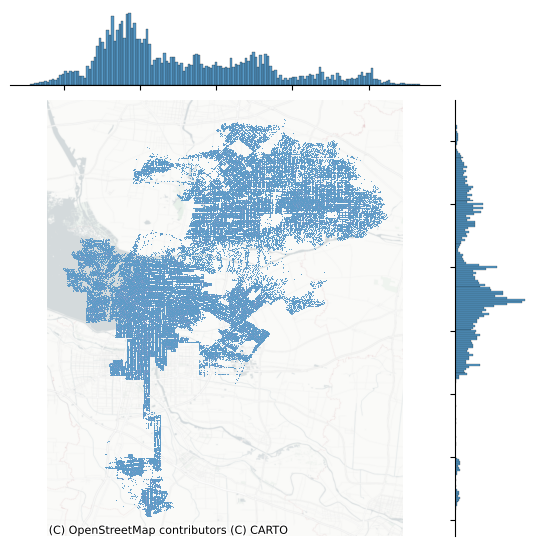

In [5]:
# Create scatter plot with histograms on axes
joint_axes = sns.jointplot(x='LON', y='LAT', data=df_crime, s=0.5)

# Add basemap
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels)

# Remove axes
joint_axes.ax_joint.set_axis_off()

In [5]:
df_crime_new = df_crime[['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Status Desc', 
                        'Vict Sex', 'Vict Descent','Mocodes', 'Premis Cd', 'Premis Desc', 'LAT', 'LON', 'LOCATION']]
df_crime_new.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Status Desc,Vict Sex,Vict Descent,Mocodes,Premis Cd,Premis Desc,LAT,LON,LOCATION
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,Adult Arrest,M,O,NaN,101.0,STREET,34.0375,118.3506,1900 S LONGWOOD AV
1,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,Invest Cont,M,O,1822 1402 0344,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),34.0444,118.2628,1000 S FLOWER ST
2,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,Invest Cont,X,X,0344 1251,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,118.3002,1400 W 37TH ST
3,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Invest Cont,M,O,0325 1501,405.0,CLOTHING STORE,34.1576,118.4387,14000 RIVERSIDE DR
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,354,THEFT OF IDENTITY,28,Invest Cont,M,H,1822 1501 0930 2004,102.0,SIDEWALK,34.0944,118.3277,1900 TRANSIENT


In [41]:
df_crime_new = df_crime_new[(df_crime_new['Vict Age'] != -2) & (df_crime_new['Vict Age'] != -1)
                           & (df_crime_new['Vict Age'] != -3) & (df_crime_new['Vict Age'] <= 90)
                           & (df_crime_new['Vict Age'] != 0)]
df_crime_new = df_crime_new[(df_crime_new['Vict Sex'] != '-')]
df_crime_new = df_crime_new[(df_crime_new['Vict Sex'] != 'H')]
df_crime_new = df_crime_new[(df_crime_new['Vict Descent'] != '-')]

In [7]:
df_crime_new = df_crime_new.dropna()

In [ ]:
print(df_crime_new['Mocodes'].unique().count())

In [55]:
import pandas as pd

# Sample dataframe to illustrate
data = {
    'Crm Cd Desc': [
        'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
        'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
        'BATTERY - SIMPLE ASSAULT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
        'THEFT PLAIN - PETTY ($950 & UNDER)', 'INTIMATE PARTNER - SIMPLE ASSAULT',
        'LEWD CONDUCT', 'THEFT PLAIN - ATTEMPT', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'OTHER MISCELLANEOUS CRIME', 'ROBBERY', 'BUNCO, GRAND THEFT',
        'SEXUAL PENETRATION W/FOREIGN OBJECT', 'BATTERY WITH SEXUAL CONTACT',
        'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION',
        'UNAUTHORIZED COMPUTER ACCESS', 'VIOLATION OF RESTRAINING ORDER',
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'BRANDISH WEAPON', 'DOCUMENT FORGERY / STOLEN FELONY',
        'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'THREATENING PHONE CALLS/LETTERS', 'EXTORTION',
        'OTHER ASSAULT', 'PICKPOCKET', 'DISTURBING THE PEACE', 'BUNCO, ATTEMPT',
        'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'PEEPING TOM',
        'VIOLATION OF COURT ORDER', 'FALSE POLICE REPORT', 'CONTRIBUTING',
        'FALSE IMPRISONMENT', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'ATTEMPTED ROBBERY',
        'CREDIT CARDS, FRAUD USE ($950 & UNDER', 'CHILD STEALING',
        'LEWD/LASCIVIOUS ACTS WITH CHILD', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
        'CHILD NEGLECT (SEE 300 W.I.C.)', 'STALKING', 'DISHONEST EMPLOYEE - GRAND THEFT', 'TRESPASSING',
        'BURGLARY, ATTEMPTED', 'RAPE, ATTEMPTED', 'DISCHARGE FIREARMS/SHOTS FIRED', 'ARSON',
        'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'VEHICLE - ATTEMPT STOLEN', 'PANDERING',
        'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'RESISTING ARREST',
        'BURGLARY FROM VEHICLE, ATTEMPTED', 'THEFT, PERSON', 'BATTERY POLICE (SIMPLE)',
        'INDECENT EXPOSURE', 'THEFT FROM PERSON - ATTEMPT', 'FAILURE TO YIELD', 'BOMB SCARE',
        'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
        'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'PIMPING', 'BUNCO, PETTY THEFT',
        'SHOTS FIRED AT INHABITED DWELLING', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
        'KIDNAPPING - GRAND ATTEMPT', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
        'TILL TAP - GRAND THEFT ($950.01 & OVER)', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
        'THROWING OBJECT AT MOVING VEHICLE', 'DOCUMENT WORTHLESS ($200.01 & OVER)', 'KIDNAPPING',
        'CRIMINAL HOMICIDE', 'PURSE SNATCHING', 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
        'DISHONEST EMPLOYEE - PETTY THEFT', 'CHILD PORNOGRAPHY', 'WEAPONS POSSESSION/BOMBING',
        'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
        'LYNCHING', 'RECKLESS DRIVING', 'SHOPLIFTING - ATTEMPT', 'COUNTERFEIT',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 'CRUELTY TO ANIMALS', 'ILLEGAL DUMPING',
        'PROWLER', 'DRUGS, TO A MINOR', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
        'DOCUMENT WORTHLESS ($200 & UNDER)', 'BATTERY ON A FIREFIGHTER', 'MANSLAUGHTER, NEGLIGENT',
        'PETTY THEFT - AUTO REPAIR', 'THEFT, COIN MACHINE - ATTEMPT', 'TILL TAP - PETTY ($950 & UNDER)',
        'PURSE SNATCHING - ATTEMPT', 'LYNCHING - ATTEMPTED', 'BIKE - ATTEMPTED STOLEN',
        'GRAND THEFT / AUTO REPAIR', 'CONSPIRACY', 'BRIBERY', 'GRAND THEFT / INSURANCE FRAUD', 'DRUNK ROLL',
        'CHILD ABANDONMENT', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 'DISRUPT SCHOOL',
        'PICKPOCKET, ATTEMPT', 'TELEPHONE PROPERTY - DAMAGE', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
        'BIGAMY', 'FAILURE TO DISPERSE', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
        'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT',
        'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'TRAIN WRECKING'
    ]
}

df_knn = pd.DataFrame(data)

# Define the crime categories
less_important_crimes = [
    'BIKE - STOLEN',  'THEFT OF IDENTITY',
     'THEFT PLAIN - ATTEMPT', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'DISTURBING THE PEACE', 'BUNCO, PETTY THEFT',
    'TRESPASSING', 'RECKLESS DRIVING', 'SHOPLIFTING - ATTEMPT', 'COUNTERFEIT', 'ILLEGAL DUMPING',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'PETTY THEFT - AUTO REPAIR', 'TILL TAP - PETTY ($950 & UNDER)',
    'PURSE SNATCHING - ATTEMPT', 'BIKE - ATTEMPTED STOLEN', 'DISRUPT SCHOOL', 'PICKPOCKET, ATTEMPT',
    'TELEPHONE PROPERTY - DAMAGE', 'FAILURE TO DISPERSE', 'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

medium_less_important_crimes = [
        'BURGLARY FROM VEHICLE', 'BATTERY - SIMPLE ASSAULT', 'CHILD ANNOYING (17YRS & UNDER)',
    'CONTEMPT OF COURT', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT', 'OTHER MISCELLANEOUS CRIME',
    'BRANDISH WEAPON', 'DOCUMENT FORGERY / STOLEN FELONY', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
     'THREATENING PHONE CALLS/LETTERS', 'EXTORTION',
    'OTHER ASSAULT', 'PEEPING TOM', 'VIOLATION OF COURT ORDER', 'FALSE POLICE REPORT', 'CONTRIBUTING',
    'FALSE IMPRISONMENT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER', 
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'CHILD NEGLECT (SEE 300 W.I.C.)', 
    'BURGLARY, ATTEMPTED', 'VEHICLE - ATTEMPT STOLEN', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'RESISTING ARREST',
    'BURGLARY FROM VEHICLE, ATTEMPTED', 'BATTERY POLICE (SIMPLE)', 'INDECENT EXPOSURE', 'THEFT FROM PERSON - ATTEMPT',
    'FAILURE TO YIELD', 'BOMB SCARE', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'PIMPING',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER','THEFT PLAIN - PETTY ($950 & UNDER)',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
]


medium_important_crimes = [
     'TILL TAP - GRAND THEFT ($950.01 & OVER)','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'THROWING OBJECT AT MOVING VEHICLE',
    'DOCUMENT WORTHLESS ($200.01 & OVER)', 'PURSE SNATCHING', 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'DISHONEST EMPLOYEE - PETTY THEFT',  'DRIVING WITHOUT OWNER CONSENT (DWOC)',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'THEFT, COIN MACHINE - ATTEMPT', 'GRAND THEFT / AUTO REPAIR', 'CONSPIRACY', 'BRIBERY', 'GRAND THEFT / INSURANCE FRAUD',
    'DRUNK ROLL', 'CHILD ABANDONMENT', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)','DISHONEST EMPLOYEE - GRAND THEFT'
]

medium_high_important_crimes = [
    'VEHICLE - STOLEN', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
     'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'BURGLARY', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION', 'UNAUTHORIZED COMPUTER ACCESS',
    'VIOLATION OF RESTRAINING ORDER', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT','CREDIT CARDS, FRAUD USE ($950.01 & OVER)'
]
high_important_crimes = [
     'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT','CHILD STEALING',
    'ATTEMPTED ROBBERY', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'STALKING', 'RAPE, ATTEMPTED', 'DISCHARGE FIREARMS/SHOTS FIRED',
    'ARSON', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'THEFT, PERSON', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
    'SHOTS FIRED AT INHABITED DWELLING', 'KIDNAPPING - GRAND ATTEMPT', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
    'KIDNAPPING', 'CRIMINAL HOMICIDE', 'CHILD PORNOGRAPHY', 'LYNCHING', 'CRUELTY TO ANIMALS', 'BATTERY ON A FIREFIGHTER',
    'MANSLAUGHTER, NEGLIGENT', 'LYNCHING - ATTEMPTED', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'BIGAMY',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 
    'TRAIN WRECKING','WEAPONS POSSESSION/BOMBING','CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'
]

# Create the crime importance dictionary
crime_importance = {crime: 1 for crime in less_important_crimes}
crime_importance.update({crime: 2 for crime in medium_less_important_crimes})
crime_importance.update({crime: 3 for crime in medium_important_crimes})
crime_importance.update({crime: 4 for crime in medium_high_important_crimes})
crime_importance.update({crime: 5 for crime in high_important_crimes})
# Function to map the crime importance
def map_crime_importance(crime):
    return crime_importance.get(crime, 1)  # Default to 1 if crime type is not found

# Apply the mapping to create a new column in the dataframe
df_crime_new['Crime_Importance'] = df_crime_new['Crm Cd Desc'].map(map_crime_importance)

# Display the dataframe
df_crime_new.head()


,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Status Desc,Vict Sex,...,Vict Sex_F,Vict Sex_M,Vict Sex_X,Year,Month,Day,Vict_Descent_Encoded,LOCATION_Encoded,Cluster_K-MEAN,Cluster_DBSCAN
1,2020-02-08,1800.0,1.0,Central,182.0,330.0,BURGLARY FROM VEHICLE,47.0,2.0,M,...,0.0,0.0,1.0,2020.0,2.0,8.0,0.091192,0.000110,3,-1
2,2020-11-04,1700.0,3.0,Southwest,356.0,480.0,BIKE - STOLEN,19.0,2.0,X,...,0.0,1.0,0.0,2020.0,11.0,4.0,0.109699,0.000061,3,-1
3,2020-03-10,2037.0,9.0,Van Nuys,964.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,2.0,M,...,0.0,1.0,0.0,2020.0,3.0,10.0,0.091192,0.000826,1,-1
4,2020-08-17,1200.0,6.0,Hollywood,666.0,354.0,THEFT OF IDENTITY,28.0,2.0,M,...,0.0,1.0,0.0,2020.0,8.0,17.0,0.352971,0.000078,3,-1
5,2020-12-01,2300.0,18.0,Southeast,1826.0,354.0,THEFT OF IDENTITY,41.0,2.0,M,...,0.0,1.0,0.0,2020.0,12.0,1.0,0.352971,0.000024,2,-1


In [9]:
df_crime_new['DATE OCC'] = pd.to_datetime(df_crime_new['DATE OCC'])

In [10]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df_crime_new[['Vict Sex']])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Vict Sex']))
df_crime_new = pd.concat([df_crime_new, onehot_encoded_df], axis=1)
df_crime_new['Year'] = df_crime_new['DATE OCC'].dt.year
df_crime_new['Month'] = df_crime_new['DATE OCC'].dt.month
df_crime_new['Day'] = df_crime_new['DATE OCC'].dt.day

In [24]:
# Frequency encoding for 'Vict Descent'
frequency_map_vict_descent = df_crime_new['Vict Descent'].value_counts(normalize=True)
df_crime_new['Vict_Descent_Encoded'] = df_crime_new['Vict Descent'].map(frequency_map_vict_descent)

# Frequency encoding for 'LOCATION'
frequency_map_location = df_crime_new['LOCATION'].value_counts(normalize=True)
df_crime_new['LOCATION_Encoded'] = df_crime_new['LOCATION'].map(frequency_map_location)

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_crime_new[['Status Desc', 'Mocodes']] = encoder.fit_transform(df_crime_new[['Status Desc', 'Mocodes']])

In [25]:
df_crime_new = df_crime_new.dropna()
df_crime_new.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Status Desc,Vict Sex,...,Vict Sex_F,Vict Sex_M,Vict Sex_X,Year,Month,Day,Vict_Descent_Encoded,LOCATION_Encoded,Cluster_K-MEAN,Cluster_DBSCAN
1,2020-02-08,1800.0,1.0,Central,182.0,330.0,BURGLARY FROM VEHICLE,47.0,2.0,M,...,0.0,0.0,1.0,2020.0,2.0,8.0,0.091192,0.000110,1,-1
2,2020-11-04,1700.0,3.0,Southwest,356.0,480.0,BIKE - STOLEN,19.0,2.0,X,...,0.0,1.0,0.0,2020.0,11.0,4.0,0.109699,0.000061,1,-1
3,2020-03-10,2037.0,9.0,Van Nuys,964.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,2.0,M,...,0.0,1.0,0.0,2020.0,3.0,10.0,0.091192,0.000826,0,-1
4,2020-08-17,1200.0,6.0,Hollywood,666.0,354.0,THEFT OF IDENTITY,28.0,2.0,M,...,0.0,1.0,0.0,2020.0,8.0,17.0,0.352971,0.000078,1,-1
5,2020-12-01,2300.0,18.0,Southeast,1826.0,354.0,THEFT OF IDENTITY,41.0,2.0,M,...,0.0,1.0,0.0,2020.0,12.0,1.0,0.352971,0.000024,1,-1


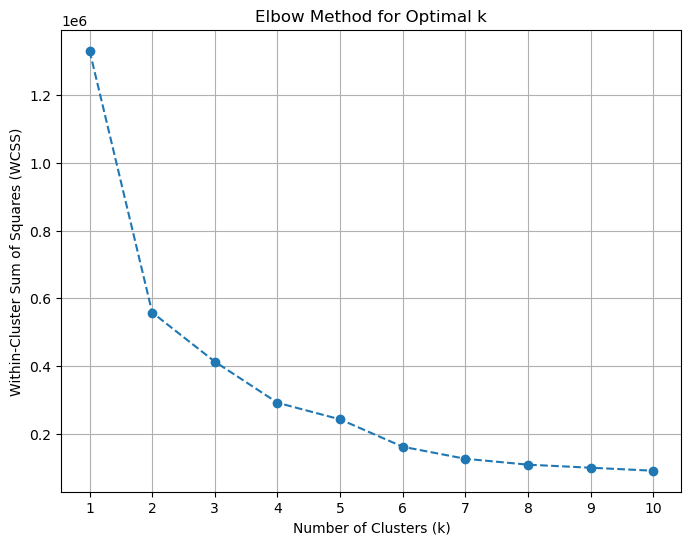

In [13]:
# ELBOW METHOD FOR BEST K IN K-MEANS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_crime_new[['LON', 'LAT'
                                                             ]]))

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [42]:
#K-MEANS CLUSTERING
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Scale the entire dataframe'
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_crime_new[['LON', 'LAT']]))
# Instantiate KMeans with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to your data
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

# Add the cluster labels to your DataFrame or data array
df_crime_new['Cluster_K-MEAN'] = kmeans_labels

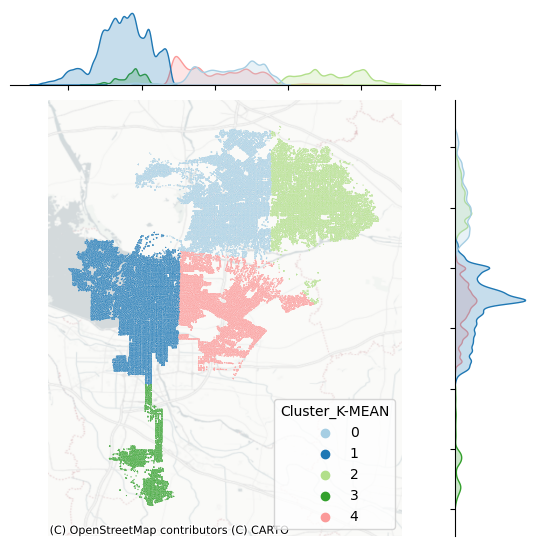

In [39]:
joint_axes = sns.jointplot(
    x='LON', y='LAT', data=df_crime_new, 
    hue='Cluster_K-MEAN', palette='Paired', s=0.75, legend=True
)

#  Add the basemap
ctx.add_basemap(
    joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels
)

#  Remove axes
joint_axes.ax_joint.set_axis_off()
plt.savefig('jointplot_with_basemap.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [27]:
# Count the number of hotspots
num_hotspots = len(df_crime_new['Cluster_K-MEAN'].unique())

# Count incidents in each hotspot
hotspot_incidents = df_crime_new.groupby('Cluster_K-MEAN').size().reset_index(name='Incidents')

# Saving the results to a file or data structure
# For example, saving to a CSV file
hotspot_incidents.to_csv('hotspot_incidents.csv', index=False)

# Displaying the number of hotspots and incidents in each hotspot
print("Number of hotspots:", num_hotspots)
print("Incidents in each hotspot:")
print(hotspot_incidents)

Number of hotspots: 5
Incidents in each hotspot:
   Cluster_K-MEAN  Incidents
0               0     228795
1               1     182791
2               2      26743
3               3     112864
4               4     114207


In [52]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, kmeans_labels)
print(score)

0.408777037195287


In [43]:
df_crime_1 = scaled_data

# Now random_sample contains a random sample of 'sample_size' rows from your dataframe

# You can print or further process the random sample as needed
df_crime_1.head()
#print(type(df_crime_1))

,0,1
0,-0.888747,-0.279742
1,-0.533117,-0.492648
2,0.783855,0.750214
3,-0.271625,0.175185
4,-1.045643,-1.168670


In [57]:
#BDSCAN CLUSTERING
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Specify the parameters for DBSCAN
eps = 0.015  
min_samples = 1000   

# Create DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN 
df_crime_coords = df_crime_1   
dbscan.fit(df_crime_coords)

# Extract cluster labels
dbscan_labels = dbscan.labels_

# Count the number of clusters (including noise points)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Subtract 1 for noise points (-1 label)

# Count incidents in each cluster
cluster_incidents = pd.Series(dbscan_labels).value_counts()

# Saving the results to a file or data structure
cluster_incidents.to_csv('spatial_clusters.csv', header=['Incidents'])

# Add the cluster labels to your DataFrame or data array
df_crime_new['Cluster_DBSCAN'] = dbscan_labels

# Displaying the number of clusters and incidents in each cluster
print("Number of spatial clusters:", num_clusters)
print("Incidents in each spatial cluster:")
print(cluster_incidents)

Number of spatial clusters: 6
Incidents in each spatial cluster:
-1    550129
 1      7524
 0      4195
 2      3509
 3      1359
 4      1022
 5      1014
dtype: int64


In [71]:
# Shiluete Score for DBSCAN
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
labels = df_crime_new.loc[df_crime_new['Cluster_DBSCAN'] != -1, 'Cluster_DBSCAN'].values
data = scaler.fit_transform(df_crime_new[df_crime_new['Cluster_DBSCAN'] != -1][['LON', 'LAT']])
score = silhouette_score(data, labels)
print(score)

0.48599196261632144


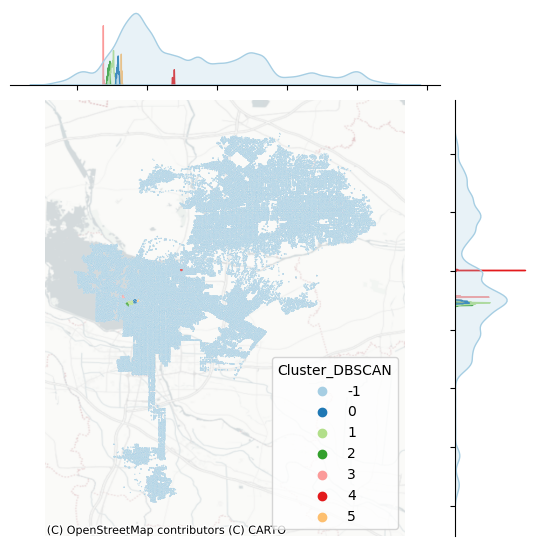

In [59]:
joint_axes = sns.jointplot(
    x='LON', y='LAT', data=df_crime_new,
    hue='Cluster_DBSCAN', palette='Paired', s=0.75, legend=True
)

# Add the basemap
ctx.add_basemap(
    joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels
)

# Remove axes
joint_axes.ax_joint.set_axis_off()
joint_axes.fig.savefig('jointplot_with_basemap2.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [58]:
#IDENTIFY WICH CRIME TYPE EACH CLUSTER CONTAINS FOR DBSCAN

# Assuming 'data' is a DataFrame containing your crime data and 'cluster_labels' is a Series containing the cluster labels
clustered_data = df_crime_new.copy()  # Make a copy of the original data
clustered_data['Cluster_DBSCAN'] = dbscan_labels  # Add cluster labels to the DataFrame

# Group data by cluster label
grouped_data = clustered_data.groupby('Cluster_DBSCAN')

# Dictionary to store crime types in each cluster
crime_types_in_clusters = {}

# Iterate over clusters
for dbscan_labels, cluster_data in grouped_data:
    # Count occurrences of each crime type in the cluster
    crime_type_counts = cluster_data['Crime_Importance'].value_counts()
    
    # Store the crime types in the cluster
    crime_types_in_clusters[dbscan_labels] = crime_type_counts

# Print crime types in each cluster
for dbscan_labels, crime_type_counts in crime_types_in_clusters.items():
    print(f"Cluster {dbscan_labels}:")
    print(crime_type_counts)
    print()

Cluster -1:
4    220919
2    213218
1     97237
5     15266
3      3489
Name: Crime_Importance, dtype: int64

Cluster 0:
2    2264
4    1373
1     391
5     146
3      21
Name: Crime_Importance, dtype: int64

Cluster 1:
2    3695
4    2743
1     797
5     266
3      23
Name: Crime_Importance, dtype: int64

Cluster 2:
2    1574
4    1391
1     390
5     149
3       5
Name: Crime_Importance, dtype: int64

Cluster 3:
2    797
4    382
1    136
5     41
3      3
Name: Crime_Importance, dtype: int64

Cluster 4:
2    478
4    396
1    104
5     37
3      7
Name: Crime_Importance, dtype: int64

Cluster 5:
2    577
4    287
1    102
5     32
3     16
Name: Crime_Importance, dtype: int64



In [23]:
df_crime_new.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Status Desc,Vict Sex,...,Vict Sex_F,Vict Sex_M,Vict Sex_X,Year,Month,Day,Vict_Descent_Encoded,LOCATION_Encoded,Cluster_K-MEAN,Cluster_DBSCAN
1,2020-02-08,1800.0,1.0,Central,182.0,330.0,BURGLARY FROM VEHICLE,47.0,Invest Cont,M,...,0.0,0.0,1.0,2020.0,2.0,8.0,0.090958,0.000111,1,-1
2,2020-11-04,1700.0,3.0,Southwest,356.0,480.0,BIKE - STOLEN,19.0,Invest Cont,X,...,0.0,1.0,0.0,2020.0,11.0,4.0,0.114585,0.000062,1,-1
3,2020-03-10,2037.0,9.0,Van Nuys,964.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,Invest Cont,M,...,0.0,1.0,0.0,2020.0,3.0,10.0,0.090958,0.000921,0,-1
4,2020-08-17,1200.0,6.0,Hollywood,666.0,354.0,THEFT OF IDENTITY,28.0,Invest Cont,M,...,0.0,1.0,0.0,2020.0,8.0,17.0,0.351724,0.000072,1,-1
5,2020-12-01,2300.0,18.0,Southeast,1826.0,354.0,THEFT OF IDENTITY,41.0,Invest Cont,M,...,0.0,1.0,0.0,2020.0,12.0,1.0,0.351724,0.000022,1,-1


In [63]:
df_crime_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654611 entries, 1 to 764164
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATE OCC              654611 non-null  datetime64[ns]
 1   TIME OCC              654611 non-null  float64       
 2   AREA                  654611 non-null  float64       
 3   AREA NAME             654611 non-null  object        
 4   Rpt Dist No           654611 non-null  float64       
 5   Crm Cd                654611 non-null  float64       
 6   Crm Cd Desc           654611 non-null  object        
 7   Vict Age              654611 non-null  float64       
 8   Status Desc           654611 non-null  object        
 9   Vict Sex              654611 non-null  object        
 10  Vict Descent          654611 non-null  object        
 11  Mocodes               105134 non-null  float64       
 12  Premis Cd             654611 non-null  float64       
 13 

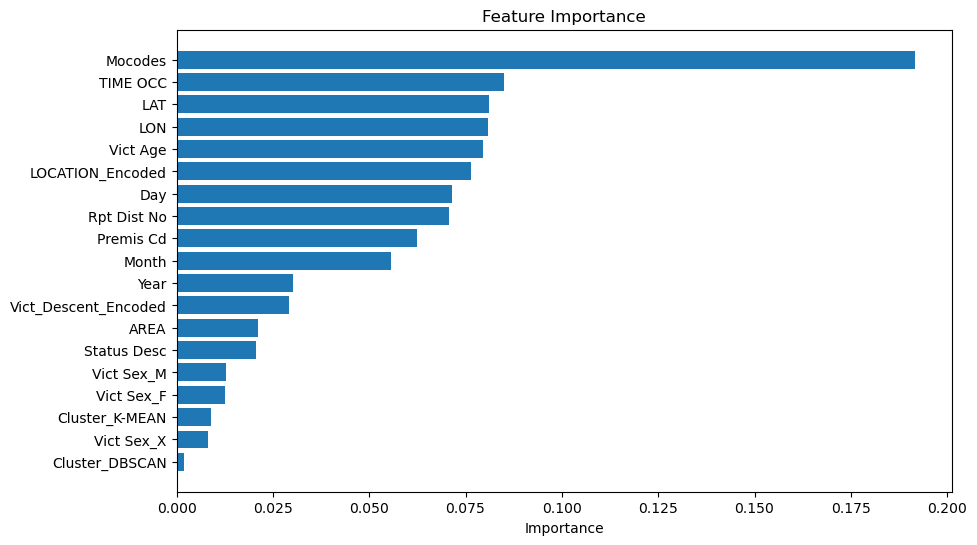

                 Feature  Importance
18               Mocodes    0.191574
0               TIME OCC    0.085044
15                   LAT    0.081093
16                   LON    0.080828
2               Vict Age    0.079542
17      LOCATION_Encoded    0.076308
4                    Day    0.071518
13           Rpt Dist No    0.070705
12             Premis Cd    0.062350
3                  Month    0.055747
5                   Year    0.030104
11  Vict_Descent_Encoded    0.029080
1                   AREA    0.021128
7            Status Desc    0.020601
9             Vict Sex_M    0.012771
8             Vict Sex_F    0.012655
14        Cluster_K-MEAN    0.008984
10            Vict Sex_X    0.008082
6         Cluster_DBSCAN    0.001886


In [60]:
# Feature Importance
X = df_crime_new[['TIME OCC', 'AREA', 'Vict Age', 'Month', 'Day', 'Year', 'Cluster_DBSCAN','Status Desc', 
                  'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_X', 'Vict_Descent_Encoded', 'Premis Cd',
                  'Rpt Dist No', 'Cluster_K-MEAN', 'LAT', 'LON', 'LOCATION_Encoded', 'Mocodes']]
y = df_crime_new['Crime_Importance']


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

# Print the feature importance
print(feature_importance_df)

In [70]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

scaler = MinMaxScaler()
X = scaler.fit_transform(df_crime_new[['TIME OCC', 'AREA', 'Vict Age', 'Month', 'Day','Status Desc', 
                  'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_X', 'Vict_Descent_Encoded', 'Premis Cd',
                  'Rpt Dist No',  'LAT', 'LON', 'LOCATION_Encoded', 'Cluster_K-MEAN','Mocodes']])
y = df_crime_new['Crime_Importance']

# Define k-NN model
knn = KNeighborsClassifier()

# Define parameters for grid search
param_grid = {'n_neighbors': range(1,21)}  

# Define spatial k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

# Print best parameter and best score
print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)


Best k value: 20
Best Accuracy: 0.4766260161113425


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

scaler = MinMaxScaler()
X = scaler.fit_transform(df_crime_new[['TIME OCC', 'AREA', 'Vict Age', 'Month', 'Day','Status Desc', 
                  'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_X', 'Vict_Descent_Encoded', 'Premis Cd',
                  'Rpt Dist No',  'LAT', 'LON', 'LOCATION_Encoded', 'Cluster_K-MEAN','Mocodes']])
y = df_crime_new['Crime_Importance']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
logistic_regression = LogisticRegression(solver='saga', max_iter=10000)

# Define parameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1']  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters with regularization:", grid_search.best_params_)
print("Best cross-validated accuracy with regularization:", grid_search.best_score_)

# Train the best model on the entire training set
best_logistic_regression = grid_search.best_estimator_
best_logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with regularization:", test_accuracy)

Best parameters with regularization: {'C': 1, 'penalty': 'l1'}
Best cross-validated accuracy with regularization: 0.441761667852702
Test set accuracy with regularization: 0.44073458694868617


In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


X = df_crime_new[['TIME OCC', 'AREA', 'Vict Age', 'Month', 'Day','Mocodes','Status Desc',  
                  'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_X', 'Vict_Descent_Encoded', 'Premis Cd',
                  'Rpt Dist No',  'LAT', 'LON','Cluster_K-MEAN', 'LOCATION_Encoded']]
y = df_crime_new['Crime_Importance']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 70, 100, 150, 200],
    'max_depth': [10, 30, 50]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Best parameters found:  {'max_depth': 30, 'n_estimators': 200}
Best accuracy:  0.6268227942670839
Accuracy: 0.6324252094487082


In [65]:
# Decission Tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


X = df_crime_new[['TIME OCC', 'AREA', 'Vict Age', 'Month', 'Day','Mocodes','Status Desc',  
                  'Vict Sex_F', 'Vict Sex_M', 'Vict Sex_X', 'Vict_Descent_Encoded', 'Premis Cd',
                  'Rpt Dist No',  'LAT', 'LON', 'Cluster_K-MEAN', 'LOCATION_Encoded']]
y = df_crime_new['Crime_Importance']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Set up the Decision Tree with grid search for hyperparameters
param_grid = {
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 20, 50, 70, 100, 150],
}
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")


Best parameters: {'max_depth': 20, 'min_samples_split': 150}
Best cross-validation score: 0.6501282397210707
Test set accuracy: 0.6522755843904668
